In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import matplotlib.pyplot as plt
import os
import cv2
import IPython.display as ipd

EPS = 1e-8

In [2]:
def get_spectrogram(wav):
    D = librosa.stft(wav, n_fft=480, hop_length=160,
                     win_length=480, window='hamming')
    spect, phase = librosa.magphase(D)
    return spect

In [3]:
file_path = 'data/birdclef-2021/train_short_audio/acafly/\XC135020.ogg'
wav, sr = librosa.load(file_path, sr=None)
print(wav.shape, wav.max(), wav.min())

(802099,) 0.14527579 -0.14948301


In [4]:
ipd.Audio(wav, rate=sr)

spectrogram shape: (241, 5014)


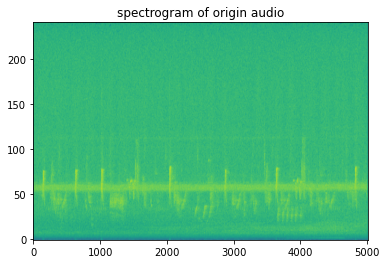

In [5]:
log_spect = np.log(get_spectrogram(wav))
print('spectrogram shape:', log_spect.shape)
plt.imshow(log_spect, aspect='auto', origin='lower',)
plt.title('spectrogram of origin audio')
plt.show()

## Time Shifting

In [6]:
start_ = int(np.random.uniform(-4800,4800))
print('time shift: ',start_)
if start_ >= 0:
    wav_time_shift = np.r_[wav[start_:], np.random.uniform(-0.001,0.001, start_)]
else:
    wav_time_shift = np.r_[np.random.uniform(-0.001,0.001, -start_), wav[:start_]]
ipd.Audio(wav_time_shift, rate=sr)

time shift:  -4317


spectrogram shape: (241, 5014)


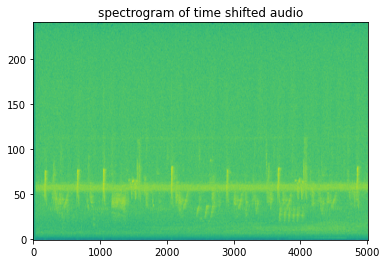

In [7]:
log_spect = np.log(get_spectrogram(wav_time_shift)+EPS)
print('spectrogram shape:', log_spect.shape)
plt.imshow(log_spect, aspect='auto', origin='lower',)
plt.title('spectrogram of time shifted audio')
plt.show()

## Speed tuning

In [28]:
##Wierd here need to check
speed_rate = np.random.uniform(0.1,1.0)
wav_speed_tune = cv2.resize(wav, (1, int(len(wav) * speed_rate))).squeeze()
print('speed rate: %.5f' % speed_rate, '(lower is faster)')

ipd.Audio(wav_speed_tune, rate=sr)


speed rate: 0.84406 (lower is faster)


spectrogram shape: (241, 4232)


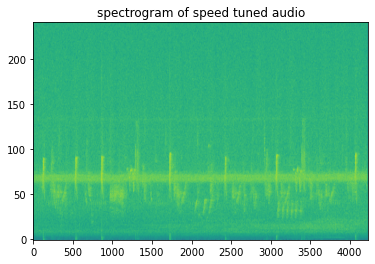

In [29]:
log_spect = np.log(get_spectrogram(wav_speed_tune)+EPS)
print('spectrogram shape:', log_spect.shape)
plt.imshow(log_spect, aspect='auto', origin='lower',)
plt.title('spectrogram of speed tuned audio')
plt.show()

## Pitch shifting